In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
def extract_digits(response):
    digits = re.findall(r'\d', response)
    digit_list = [int(digit) for digit in digits]
    return digit_list

df = pd.read_csv('./completions.csv', index_col=0)
df

,gpt-3.5-turbo-0125
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6..."
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9..."
2,3674598283456762384019283746592873459287346759...
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6..."
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...
...,...
9995,"2, 5, 8, 3"
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1..."
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1..."
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9..."


In [3]:
df['digits'] = df['gpt-3.5-turbo-0125'].apply(extract_digits)

In [4]:
df['mean'] = df['digits'].apply(np.mean)
df

,gpt-3.5-turbo-0125,digits,mean
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874
...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902


In [5]:
def duplicate_frequency(digits):
    duplicate_counter = 0
    for i in range(len(digits) - 1):
        if digits[i] == digits[i + 1]:
            duplicate_counter += 1
    frequency = duplicate_counter / (len(digits) - 1)
    return frequency

df['repeat'] = df['digits'].apply(duplicate_frequency)
df

,gpt-3.5-turbo-0125,digits,mean,repeat
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000,0.0
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804,0.0
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922,0.0
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000,0.0
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874,0.0
...,...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000,0.0
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917,0.0
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177,0.0
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902,0.0


In [6]:
def increase_frequency(digits):
    increase_counter = 0
    for i in range(len(digits) - 1):
        if digits[i] + 1 == digits[i + 1]:
            increase_counter += 1
    frequency = increase_counter / (len(digits) - 1)
    return frequency
  
df['increase'] = df['digits'].apply(increase_frequency)
df

,gpt-3.5-turbo-0125,digits,mean,repeat,increase
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000,0.0,0.102041
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804,0.0,0.099634
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922,0.0,0.292766
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000,0.0,0.062762
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874,0.0,0.004317
...,...,...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000,0.0,0.000000
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917,0.0,0.000000
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177,0.0,0.003559
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902,0.0,0.274510


In [7]:
def decrease_frequency(digits):
    decrease_counter = 0
    for i in range(len(digits) - 1):
        if digits[i] - 1 == digits[i + 1]:
            decrease_counter += 1
    frequency = decrease_counter / (len(digits) - 1)
    return frequency
  
df['decrease'] = df['digits'].apply(decrease_frequency)
df

,gpt-3.5-turbo-0125,digits,mean,repeat,increase,decrease
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000,0.0,0.102041,0.020408
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804,0.0,0.099634,0.000000
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922,0.0,0.292766,0.067381
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000,0.0,0.062762,0.087866
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874,0.0,0.004317,0.279137
...,...,...,...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000,0.0,0.000000,0.000000
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917,0.0,0.000000,0.000000
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177,0.0,0.003559,0.003559
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902,0.0,0.274510,0.166667


In [8]:
df['length'] = df['digits'].apply(len)
df

,gpt-3.5-turbo-0125,digits,mean,repeat,increase,decrease,length
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000,0.0,0.102041,0.020408,50
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804,0.0,0.099634,0.000000,1366
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922,0.0,0.292766,0.067381,3830
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000,0.0,0.062762,0.087866,240
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874,0.0,0.004317,0.279137,696
...,...,...,...,...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000,0.0,0.000000,0.000000,4
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917,0.0,0.000000,0.000000,411
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177,0.0,0.003559,0.003559,282
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902,0.0,0.274510,0.166667,205


In [9]:
print(df['length'].mean())
print(df['length'].std())

307.9755
710.7606959986234


In [10]:
print(df['mean'].mean())
print(df['mean'].std())

4.491942404111706
0.07033525936161929


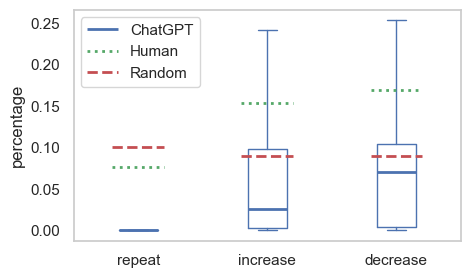

In [11]:
# plot repeat, increase, and decrease percentages

# plot gpt values
figure_params = {
    'figsize': (5, 3),
    'grid': False,
    'boxprops': dict(color='b', linewidth=1),
    'whiskerprops': dict(color='b', linewidth=1),
    'capprops': dict(color='b', linewidth=1),
    'medianprops': dict(color='b', linewidth=2, label='ChatGPT'),
}
ax = df.boxplot(
    column=['repeat', 'increase', 'decrease'],
    showfliers=False,
    **figure_params
)

# plot human values
human_vals = {'repeat': 0.076, 'increase': 0.154, 'decrease': 0.169}
human_params = {'color': 'g', 'linewidth': 2, 'linestyle': ':', 'label': 'Human'}
plt.plot(
    [.8, 1.2],
    [human_vals['repeat'], human_vals['repeat']],
    **human_params
)
plt.plot(
    [1.8, 2.2],
    [human_vals['increase'], human_vals['increase']],
    **human_params
)
plt.plot(
    [2.8, 3.2],
    [human_vals['decrease'], human_vals['decrease']],
    **human_params
)

# plot true values
true_vals = {'repeat': 0.1, 'increase': 0.09, 'decrease': 0.09}
true_params = {'color': 'r', 'linewidth': 2, 'linestyle': '--', 'label': 'Random'}
plt.plot(
    [.8, 1.2],
    [true_vals['repeat'], true_vals['repeat']],
    **true_params
)
plt.plot(
    [1.8, 2.2],
    [true_vals['increase'], true_vals['increase']],
    **true_params
)
plt.plot(
    [2.8, 3.2],
    [true_vals['decrease'], true_vals['decrease']],
    **true_params
)

# remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
unique_handles, unique_labels = list(unique.values()), list(unique.keys())
ax.legend(unique_handles, unique_labels, loc='upper left')

plt.ylabel('percentage')
plt.show()

In [12]:
print(df['repeat'].mean(), df['increase'].mean(), df['decrease'].mean())

0.00048178693224931913 0.06264578842258836 0.07840254701339418


In [13]:
# compute distribution for each digit
def digit_frequency(digits, digit):
    digit_counter = 0
    for i in range(len(digits)):
        if digits[i] == digit:
            digit_counter += 1
    frequency = digit_counter / len(digits)
    return frequency

for digit in range(10):
    df[str(digit)] = df['digits'].apply(lambda x: digit_frequency(x, digit))
df

,gpt-3.5-turbo-0125,digits,mean,repeat,increase,decrease,length,0,1,2,3,4,5,6,7,8,9
0,"3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, 6...","[3, 5, 8, 2, 7, 1, 0, 6, 4, 9, 2, 8, 1, 7, 5, ...",4.500000,0.0,0.102041,0.020408,50,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,"0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, 9...","[0, 7, 2, 5, 9, 4, 8, 1, 3, 6, 0, 2, 7, 8, 4, ...",4.497804,0.0,0.099634,0.000000,1366,0.100293,0.099561,0.100293,0.100293,0.100293,0.099561,0.099561,0.100293,0.100293,0.099561
2,3674598283456762384019283746592873459287346759...,"[3, 6, 7, 4, 5, 9, 8, 2, 8, 3, 4, 5, 6, 7, 6, ...",5.509922,0.0,0.292766,0.067381,3830,0.000261,0.000522,0.126371,0.119060,0.126632,0.126110,0.122977,0.125849,0.126371,0.125849
3,"3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, 6...","[3, 7, 2, 6, 8, 1, 4, 9, 0, 5, 2, 8, 7, 4, 1, ...",4.500000,0.0,0.062762,0.087866,240,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
4,4 8 1 3 7 6 2 5 0 9 3 6 2 1 7 5 0 9 8 4 3 1 6 ...,"[4, 8, 1, 3, 7, 6, 2, 5, 0, 9, 3, 6, 2, 1, 7, ...",4.502874,0.0,0.004317,0.279137,696,0.099138,0.100575,0.100575,0.100575,0.099138,0.099138,0.100575,0.099138,0.100575,0.100575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"2, 5, 8, 3","[2, 5, 8, 3]",4.500000,0.0,0.000000,0.000000,4,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
9996,"8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, 1...","[8, 3, 5, 2, 0, 7, 4, 1, 6, 9, 2, 8, 4, 0, 3, ...",4.493917,0.0,0.000000,0.000000,411,0.099757,0.099757,0.102190,0.099757,0.099757,0.099757,0.099757,0.099757,0.099757,0.099757
9997,"5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, 1...","[5, 1, 8, 3, 2, 7, 0, 6, 4, 9, 2, 0, 3, 8, 6, ...",4.475177,0.0,0.003559,0.003559,282,0.102837,0.099291,0.102837,0.099291,0.099291,0.099291,0.099291,0.099291,0.099291,0.099291
9998,"5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, 9...","[5, 8, 2, 4, 1, 3, 9, 6, 7, 0, 5, 3, 2, 1, 4, ...",4.443902,0.0,0.274510,0.166667,205,0.102439,0.102439,0.102439,0.102439,0.097561,0.102439,0.097561,0.097561,0.097561,0.097561


In [14]:
for digit in range(10):
    print(f"{digit} = {df[str(digit)].mean()}")

0 = 0.0987293125027923
1 = 0.09943275226480745
2 = 0.10288453174049902
3 = 0.10097938250963066
4 = 0.10025047452327171
5 = 0.10007323665221922
6 = 0.09926365668778439
7 = 0.09900952404385029
8 = 0.10060841062713749
9 = 0.09876871844800753


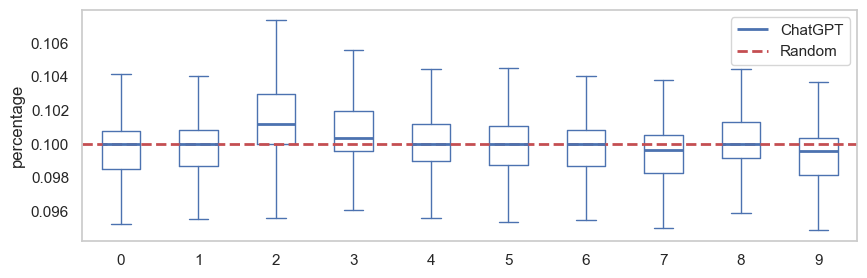

In [15]:
# plot percentages for each digit

# plot gpt values
figure_params = {
    'figsize': (10, 3),
    'grid': False,
    'boxprops': dict(color='b', linewidth=1),
    'whiskerprops': dict(color='b', linewidth=1),
    'capprops': dict(color='b', linewidth=1),
    'medianprops': dict(color='b', linewidth=2, label='ChatGPT'),
}
ax = df.boxplot(
    column=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    showfliers=False,
    **figure_params
)

# plot true values
plt.axhline(y=0.1, linestyle='--', color='r', linewidth=2, label='Random')

# remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
unique_handles, unique_labels = list(unique.values()), list(unique.keys())
ax.legend(unique_handles, unique_labels, loc='upper right')

plt.ylabel('percentage')
plt.show()